# 3 - PSD

Loads PSD data and then plots for various circumstances.

## Imports
Necessary modules for analysis.

In [1]:
# import modules

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
for i in range(2):
    %matplotlib notebook

In [2]:
# import data

adcp = 'Axis55'     # Slope(2013,2014,2017,2018), Axis75(2013,2014), Axis55(2017,2018)
year = 2017
ds = xr.open_dataset(f'./data/2_psd_pro/2_psd_pro_{adcp}_{year}.nc')
#print(ds)

In [4]:
# extract plotting variables & GM

t_stamp = ds.t_stamp
depth = ds.depth.values
f = ds.f_PSD.values

# GM spectrum

gm = np.loadtxt('../project/archive/GM/gm.dat')   # get GM data from separate code
gm_freq = gm[:, 0]                                # GM based on N at -904 m
gm_psd = gm[:, 1]

## Depth comparison PSD

In [6]:
# select depths

dupidx = 0                                     # upper depth
dlowidx = -1                                   # lower depth

dup_stamp = -depth[dupidx]                     # stamps for plotting
dlow_stamp = -depth[dlowidx]

u_up = ds.u_PSD[dupidx].values                 # data for plotting
v_up = ds.v_PSD[dupidx].values
u_low = ds.u_PSD[dlowidx].values
v_low = ds.v_PSD[dlowidx].values

u_up_upper = ds.u_conf_upper[dupidx].values    # confidence intervals
u_up_lower = ds.u_conf_lower[dupidx].values
v_up_upper = ds.v_conf_upper[dupidx].values
v_up_lower = ds.v_conf_lower[dupidx].values
u_low_upper = ds.u_conf_upper[dlowidx].values
u_low_lower = ds.u_conf_lower[dlowidx].values
v_low_upper = ds.v_conf_upper[dlowidx].values
v_low_lower = ds.v_conf_lower[dlowidx].values

<IPython.core.display.Javascript object>


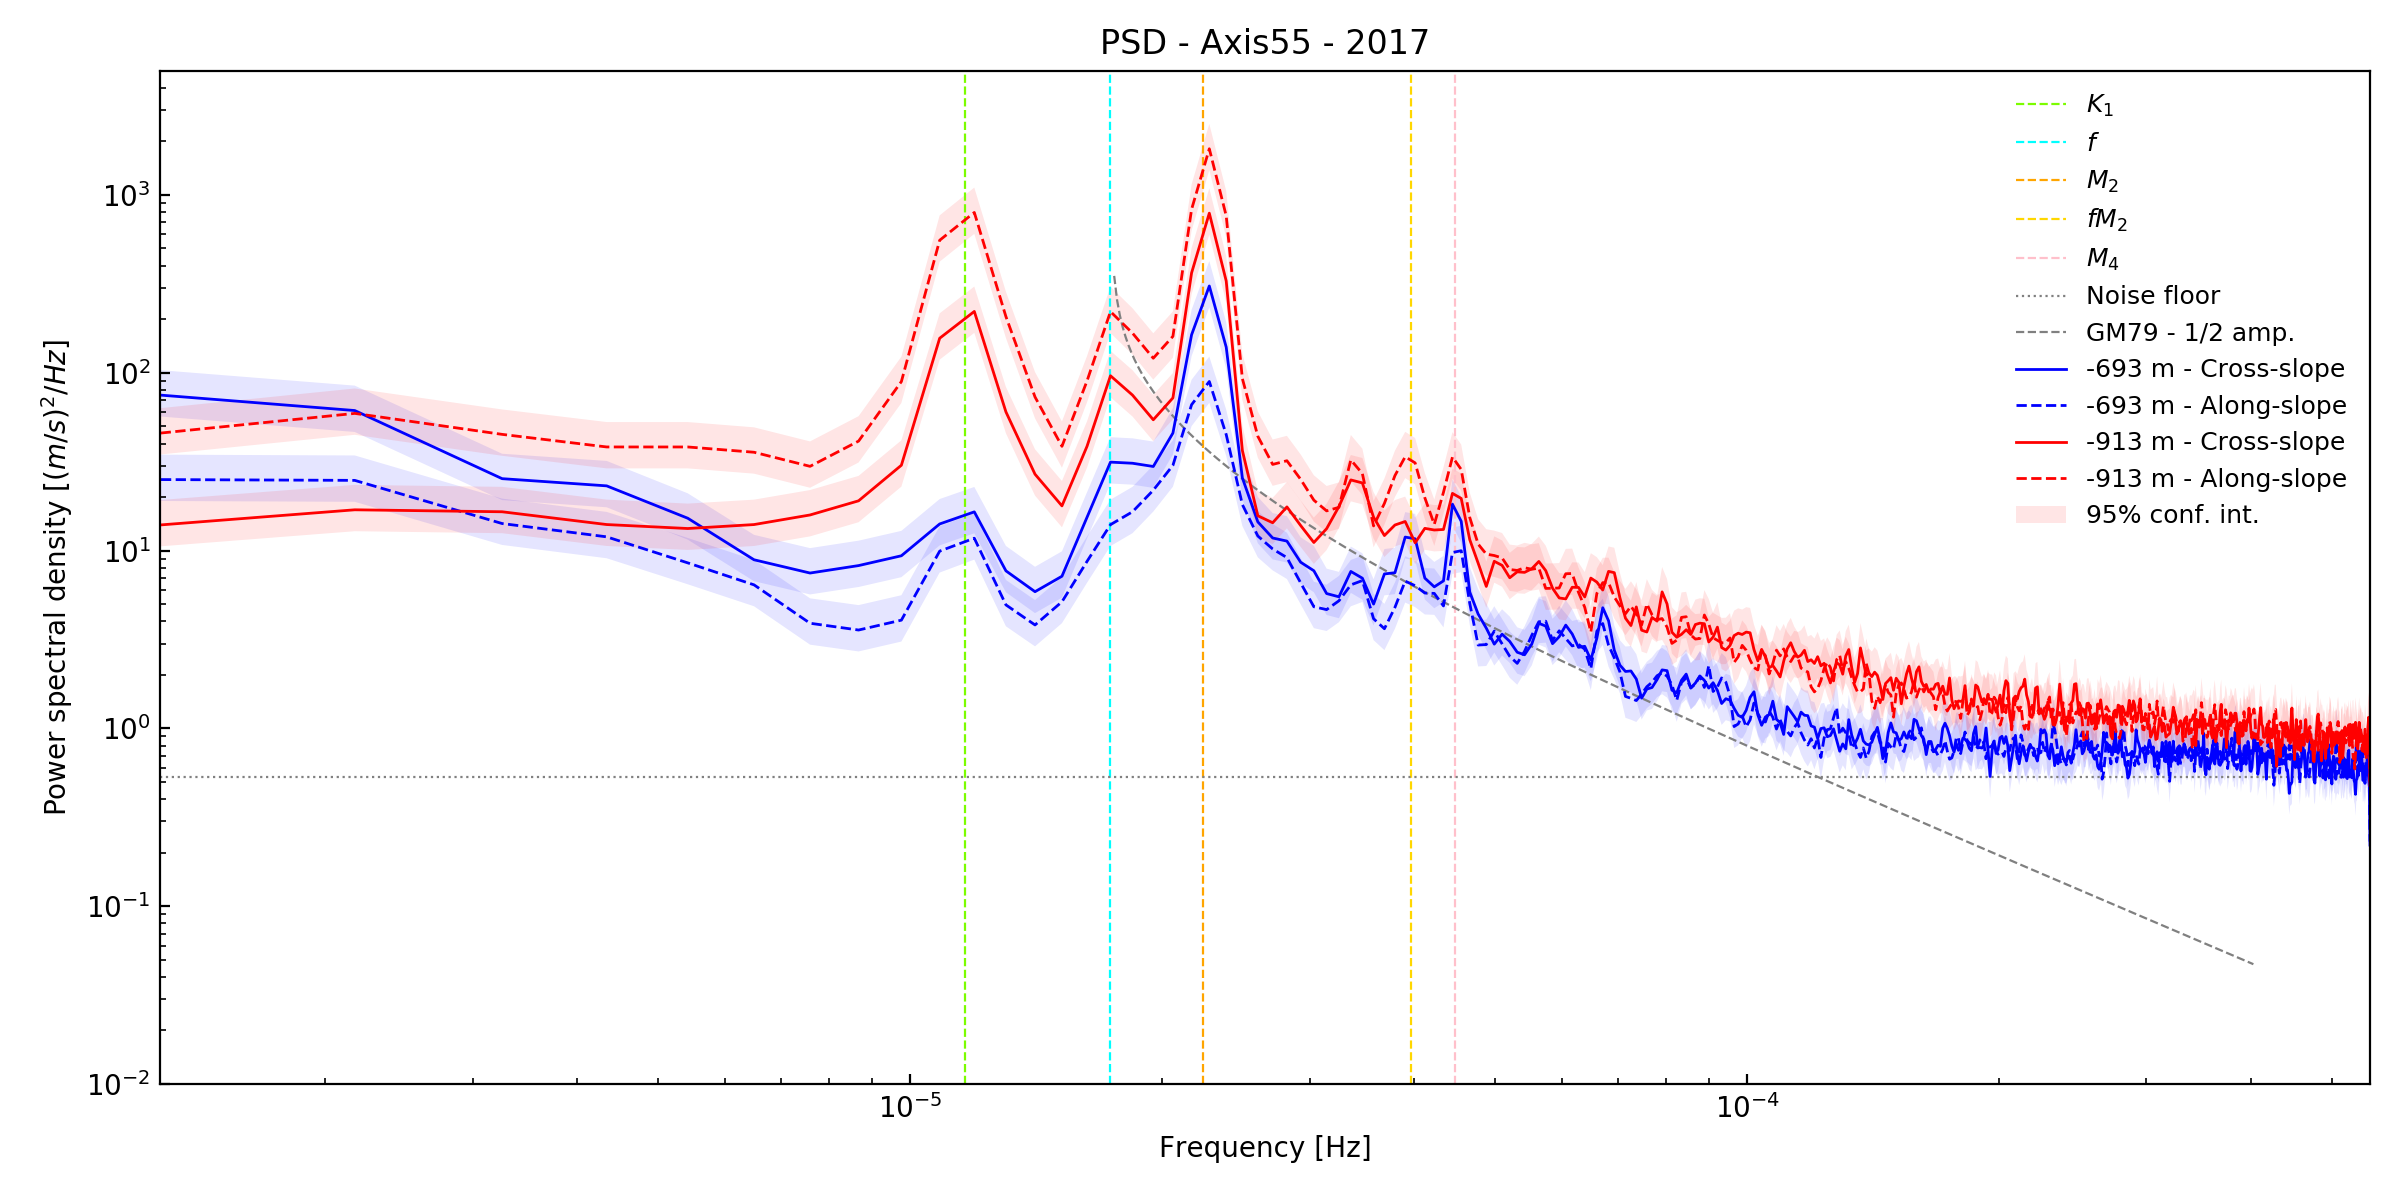

In [7]:
# plot PSD

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.axvline(1.161e-5, color ='lawngreen',ls='--',lw=0.8,label = "$K_1$") # constituents
ax.axvline(1.732e-5, color ='cyan',ls='--', lw=0.8,label = "$f$")    
ax.axvline(2.236e-5, color ='orange',ls='--',lw=0.8,label = "$M_2$")
ax.axvline(3.968e-5, color ='gold',ls='--',lw=0.8,label = "$fM_2$")
ax.axvline(4.472e-5, color ='pink',ls='--',lw=0.8,label = "$M_4$")
ax.set_ylim(1e-2,5e3)          # set y limits for comparing PSD
ax.set_xlim(1.27e-6, 5.55e-4)  # first non-zero freq bin to the Nyquist freq 

ax.tick_params(axis='both', direction='in', which='both')
ax.set_title(f'PSD - {adcp} - {t_stamp}')
ax.set_ylabel('Power spectral density [$(m/s)^2/Hz$]')
ax.set_xlabel('Frequency [Hz]')

if adcp == 'Axis75' or adcp == 'Slope':
    ax.axhline(2.3e-2,color='gray',ls=':',lw=0.8,label='Noise floor')
elif adcp == 'Axis55':
    ax.axhline(0.53,color='gray',ls=':',lw=0.8,label='Noise floor')
    
ax.loglog(gm_freq/(2*np.pi),gm_psd*(np.pi),color='gray',lw=0.8,ls='--', label='GM79 - 1/2 amp.') # 1/2 GM for components
ax.loglog(f, u_up, label=f'{dup_stamp} m - Cross-slope',color='blue',lw=1)
ax.loglog(f, v_up, label=f'{dup_stamp} m - Along-slope',color='blue',ls='--',lw=1)
ax.loglog(f, u_low, label=f'{dlow_stamp} m - Cross-slope',color='red',lw=1)
ax.loglog(f, v_low, label=f'{dlow_stamp} m - Along-slope',color='red',ls='--',lw=1)

ax.fill_between(f, u_up_lower, u_up_upper, facecolor='blue', alpha=0.1)
ax.fill_between(f, v_up_lower, v_up_upper, facecolor='blue', alpha=0.1)
ax.fill_between(f, u_low_lower, u_low_upper, facecolor='red', alpha=0.1)
ax.fill_between(f, v_low_lower, v_low_upper, facecolor='red', alpha=0.1, label='95% conf. int.')

fig.tight_layout()
plt.legend(loc='upper right',frameon=False,fontsize=9)
plt.show()

plt.savefig(fname=f'./plots/psd_plots/psd_{adcp}_{t_stamp}.pdf',format='pdf')